In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')

In [3]:
!mkdir images_train
!mkdir images_train/0
!mkdir images_train/1
!mkdir images_train/2
!mkdir images_train/3
!mkdir images_train/4
!mkdir images_train/5
!mkdir images_train/6
!mkdir images_train/7
!mkdir images_train/8
!mkdir images_train/9
!mkdir images_test

In [4]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'./images_train/{digit}/{train["id"][idx]}.png', img)

In [5]:
import cv2

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'./images_test/{test["id"][idx]}.png', img)

In [6]:
import tensorflow as tf
EfficientNetB3_model =  tf.keras.applications.EfficientNetB3(weights=None, include_top=True, input_shape=(300, 300, 1), classes=10)

In [7]:
from tensorflow.keras.optimizers import Adam
EfficientNetB3_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('./images_train', target_size=(300,300), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('./images_train', target_size=(300,300), color_mode='grayscale', class_mode='categorical', subset='validation')

Found 1642 images belonging to 10 classes.
Found 406 images belonging to 10 classes.


In [9]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_EfficientNetB3(InputShape-300x300).h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [10]:
EfficientNetB3_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 1) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 300, 300, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 300, 300, 1)  3           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 301, 301, 1)  0           normalization[0][0]              
_____________________________________________________________________________________

In [11]:
EfficientNetB3_model.fit_generator(train_generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
52/52 [==============================] - 71s 823ms/step - loss: 3.9098 - accuracy: 0.1230 - val_loss: 2.8677 - val_accuracy: 0.0985

Epoch 00001: val_accuracy improved from -inf to 0.09852, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_EfficientNetB3(InputShape-300x300).h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
52/52 [==============================] - 40s 762ms/step - loss: 2.6873 - accuracy: 0.1267 - val_loss: 2.8487 - val_accuracy: 0.0985

Epoch 00002: val_accuracy did not improve from 0.09852
Epoch 3/500
52/52 [==============================] - 40s 772ms/step - loss: 2.4958 - accuracy: 0.1790 - val_loss: 3.1051 - val_accuracy: 0.0985

Epoch 00003: val_accuracy did not improve from 0.09852
Epoch 4/500
52/52 [==============================] - 40s 763ms/step - loss: 2.2698 - accuracy: 0.2400 - val_loss: 2.9271 - val_accuracy: 0.0985

Epoch 00004: val_accuracy did not improve from 0.09852
Epoch 5/500
52/52 [==============================] - 40s 758ms/step - loss: 2.1130 - accuracy: 0.3155 - val_loss: 2.8394 - val_accuracy: 0.0936

Epoch 00005: val_accuracy did not improve from 0.09852
Epoch 6/500
52/52 [==============================] - 40s 764ms/step - loss: 1.7751 - accuracy: 0.4178 - val_loss: 3.2448 - val_accuracy: 0.0936

Epoch 00006: val_accuracy did not improve from 0.09852


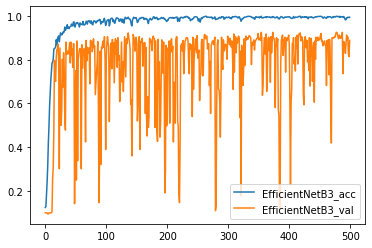

In [12]:
import matplotlib.pyplot as plt

plt.plot(EfficientNetB3_model.history.history["accuracy"], label='EfficientNetB3_acc')
plt.plot(EfficientNetB3_model.history.history["val_accuracy"], label='EfficientNetB3_val')

plt.legend()
plt.show()

In [13]:
EfficientNetB3_model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_EfficientNetB3(InputShape-300x300).h5', compile=False)

In [ ]:
!mkdir images_test/none
!mv images_test/*.png images_test/none

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('./images_test', target_size=(300,300), color_mode='grayscale', class_mode='categorical', shuffle=False)

In [16]:
EfficientNetB3_predict = EfficientNetB3_model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission.head()

In [ ]:
import numpy as np
mylist = []

for i in range(len(submission)):
    name =  test_generator.filenames
    id = name[i].split('/')[1].rstrip('.').split('.')[0]
    mylist.append(id)
print(mylist)

In [ ]:
for i in range(len(submission)):
    submission["id"][i] = mylist[i]

In [20]:
submission["EfficientNetB3_predict"] = EfficientNetB3_predict
submission.head()

,id,digit,EfficientNetB3_predict
0,10000,0,4
1,10001,0,4
2,10002,0,6
3,10003,0,9
4,10004,0,5


In [21]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['EfficientNetB3_predict']]
    submission.at[i, "digit"] = Counter(predicts).most_common(n=1)[0][0]

submission.head()

,id,digit,EfficientNetB3_predict
0,10000,4,4
1,10001,4,4
2,10002,6,6
3,10003,9,9
4,10004,5,5


In [ ]:
submission = submission[['id', 'digit']]
submission.head()

In [23]:
from google.colab import files

submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/EfficientNetB3_model(InputShape-300x300).csv', index=False)
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/EfficientNetB3_model(InputShape-300x300).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>